In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('drive/My Drive/Colab Notebooks/train_news.csv')

In [9]:
df.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [10]:
df.tail()

,Unnamed: 0,id,headline,written_by,news,label
20795,20795,5671,NaN,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
20796,20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,20798,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0
20799,20799,15660,Emory University to Pay for ’100 Percent’ of U...,Tom Ciccotta,"Emory University in Atlanta, Georgia, has anno...",0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20800 non-null  int64 
 1   id          20800 non-null  int64 
 2   headline    20242 non-null  object
 3   written_by  18843 non-null  object
 4   news        20761 non-null  object
 5   label       20800 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 975.1+ KB


In [12]:
# Checking Null Values

In [13]:
df.isnull().sum()

Unnamed: 0       0
id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

In [14]:
# Dropping a column (written_by) which consist many null values

In [15]:
df.drop(['written_by'], axis=1, inplace=True)

In [16]:
df.head()

,Unnamed: 0,id,headline,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...","AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham has written extensively on...,1


In [17]:
# Dropping 39 rows with No News

In [18]:
df = df.dropna(subset=['news'], axis=0)

In [19]:
df.isnull().sum()

Unnamed: 0      0
id              0
headline      558
news            0
label           0
dtype: int64

In [20]:
# As headlines has 558 NaN Values. So, we will replace with dummy value - (No Heading)

In [21]:
df['headline'].fillna('No Heading',inplace=True)

In [22]:
df.head(10)

,Unnamed: 0,id,headline,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...","AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham has written extensively on...,1
5,5,3196,Whatever the Outcome on November 8th the US Wi...,Taming the corporate media beast Whatever the ...,1
6,6,5134,Rapid Evolution Saved This Fish From Pollution...,The State of New Jersey says you can’t eat the...,0
7,7,1504,Alabama Prison Officials Retaliate Against Pri...,Advocates say prison officials at the Kilby Co...,1
8,8,13559,No Heading,People have made up their minds on president.\...,1
9,9,4203,Can We Live in a Constant State of Love?,Leave a reply \nToni Emerson – When we fall in...,1


In [23]:
# Checking Null Values Again and we didn't find any NaN Values

In [24]:
df.isnull().sum()

Unnamed: 0    0
id            0
headline      0
news          0
label         0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20761 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20761 non-null  int64 
 1   id          20761 non-null  int64 
 2   headline    20761 non-null  object
 3   news        20761 non-null  object
 4   label       20761 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 973.2+ KB


In [26]:
# 0 : Real | 1 : Fake

In [27]:
df.label.value_counts()

0    10387
1    10374
Name: label, dtype: int64

In [28]:
# Ratio between Real & Fake News

In [29]:
print ('Real News = ', round(len(df[df['label']==0]) / len(df.label),2)*100,'%')
print ('Fake News  = ', round(len(df[df['label']==1]) / len(df.label),2)*100,'%')

Real News =  50.0 %
Fake News  =  50.0 %


In [30]:
import matplotlib.pyplot as plt

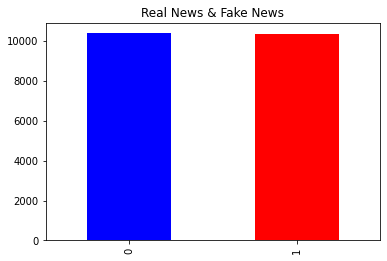

In [31]:
count_Class = pd.value_counts(df["label"], sort= True)
count_Class.plot(kind = 'bar',color = ["blue","red"])
plt.title('Real News & Fake News')
plt.show();

In [32]:
# Combine headline & news to new column (f_news), where as f denoted to final

In [33]:
df['f_news'] = df[['headline', 'news']].apply(lambda x: ' '.join(x), axis = 1)

In [34]:
df.head()

,Unnamed: 0,id,headline,news,label,f_news
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,Ethics Questions Dogged Agriculture Nominee as...
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,HOUSTON — Venezuela had a plan. It was a ta...,0,U.S. Must Dig Deep to Stop Argentina’s Lionel ...
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,"Sunday on ABC’s “This Week,” while discussing ...",0,Cotton to House: ’Do Not Walk the Plank and Vo...
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...","AUGUSTA, Me. — The beleaguered Republican g...",0,"Paul LePage, Besieged Maine Governor, Sends Co..."
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham has written extensively on...,1,A Digital 9/11 If Trump Wins Finian Cunningh...


In [35]:
df['f_news_len'] = df.f_news.str.len()

In [36]:
df.head()

,Unnamed: 0,id,headline,news,label,f_news,f_news_len
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,Ethics Questions Dogged Agriculture Nominee as...,8021
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,HOUSTON — Venezuela had a plan. It was a ta...,0,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,6185
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,"Sunday on ABC’s “This Week,” while discussing ...",0,Cotton to House: ’Do Not Walk the Plank and Vo...,526
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...","AUGUSTA, Me. — The beleaguered Republican g...",0,"Paul LePage, Besieged Maine Governor, Sends Co...",6617
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham has written extensively on...,1,A Digital 9/11 If Trump Wins Finian Cunningh...,9193


In [37]:
# Cleaning

In [38]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import string
import re
from nltk.corpus import wordnet, stopwords, sentiwordnet
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer, WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk import pos_tag
import ast

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [39]:
# lemmatizer = WordNetLemmatizer()
# stemmer = PorterStemmer() 
def clean_text(text):
    text=str(text)
    text = text.lower()
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', text)
    rem_num = re.sub('[0-9]+', '', text)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[PorterStemmer().stem(w) for w in filtered_words]
    lemma_words=[WordNetLemmatizer().lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

In [40]:
df["f_news"] = df["news"].apply(lambda x: clean_text(x))

In [41]:
df['f_news_clean_len'] = df.news.str.len()

In [42]:
df.head()

,Unnamed: 0,id,headline,news,label,f_news,f_news_len,f_news_clean_len
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,washington sonny perdue telling georgians grow...,8021,7936
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,HOUSTON — Venezuela had a plan. It was a ta...,0,houston venezuela plan tactical approach desig...,6185,6112
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,"Sunday on ABC’s “This Week,” while discussing ...",0,sunday abc week discussing republican plan rep...,526,425
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...","AUGUSTA, Me. — The beleaguered Republican g...",0,augusta beleaguered republican governor maine ...,6617,6516
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham has written extensively on...,1,finian cunningham written extensively internat...,9193,9164


In [43]:
print ('Origian News Length : ', df.f_news_len.sum())
print ('Clean News Length : ', df.f_news_clean_len.sum())

Origian News Length :  96045855
Clean News Length :  94518924


In [44]:
df.describe()

,Unnamed: 0,id,label,f_news_len,f_news_clean_len
count,20761.000000,20761.000000,20761.000000,20761.000000,20761.000000
mean,10398.943741,10401.130341,0.499687,4626.263427,4552.715380
std,6004.226981,6005.142716,0.500012,5132.601417,5130.563491
min,0.000000,0.000000,0.000000,12.000000,1.000000
25%,5201.000000,5201.000000,0.000000,1706.000000,1628.000000
50%,10399.000000,10401.000000,0.000000,3441.000000,3361.000000
75%,15597.000000,15603.000000,1.000000,6354.000000,6275.000000
max,20799.000000,20799.000000,1.000000,143035.000000,142961.000000


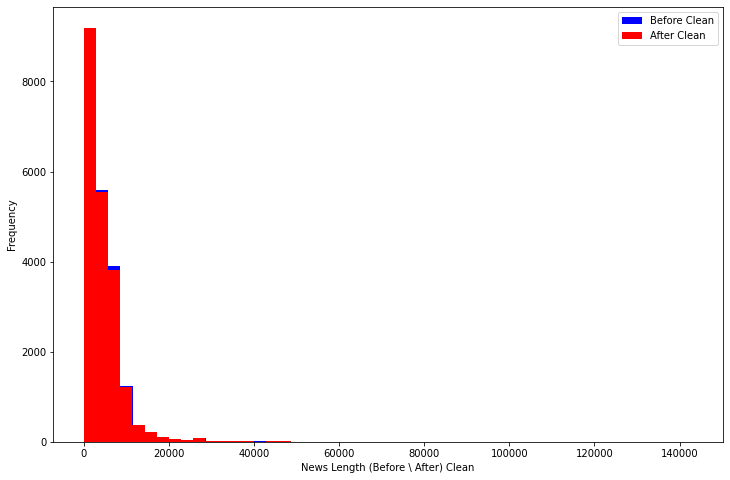

In [45]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes()
df['f_news_len'].plot(bins=50, kind='hist',ax=ax,color = 'blue', label='Before Clean')
df['f_news_clean_len'].plot(bins=50, kind='hist',ax=ax,color = 'red', label='After Clean')
ax.set(xlabel = 'News Length (Before \ After) Clean',ylabel = 'Frequency');
plt.legend()

In [46]:
# Most Frequent Words in Fake and Real News

In [47]:
from nltk import tokenize
import seaborn as sns
import numpy as np

In [48]:
token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency")
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

In [49]:
# frequent words in Real news

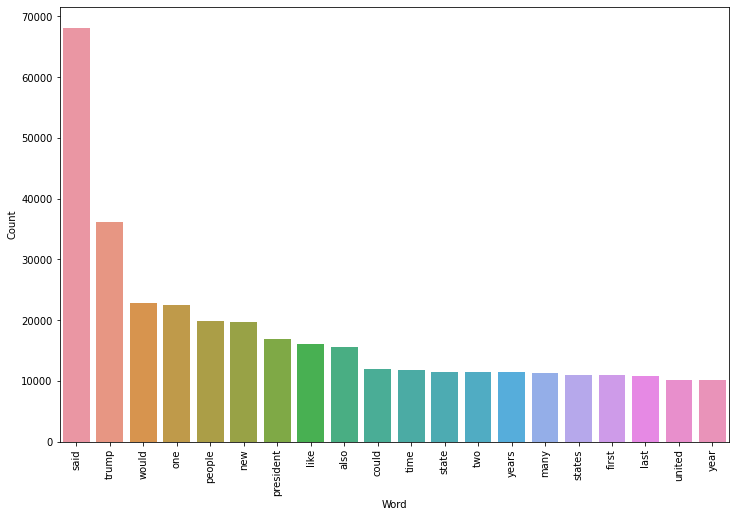

In [50]:
counter(df[df["label"] == 0], "f_news", 20)

In [51]:
# frequent words in Fake news

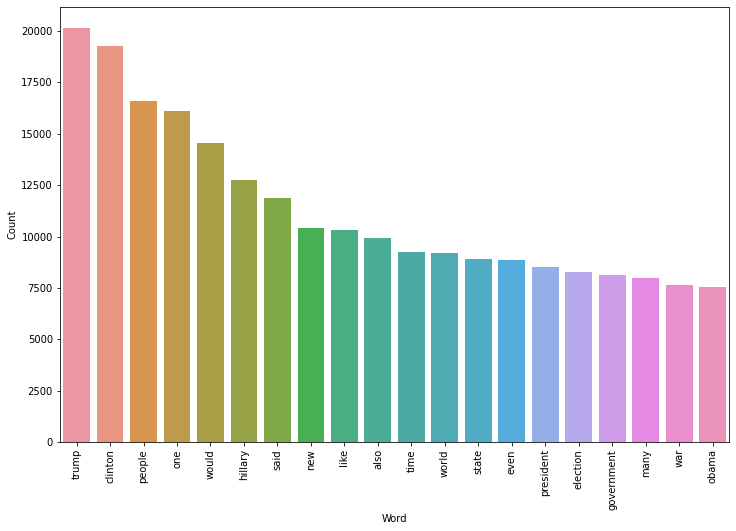

In [52]:
counter(df[df["label"] == 1], "f_news", 20)

In [53]:
# Word Cloud

In [54]:
from wordcloud import WordCloud

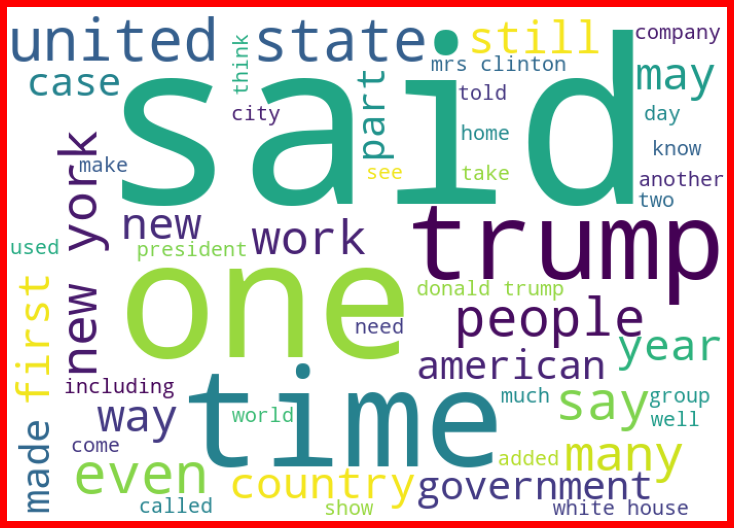

In [55]:
# Real News Word Cloud
real = df['f_news'][df['label']==0]
real_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(real))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(real_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

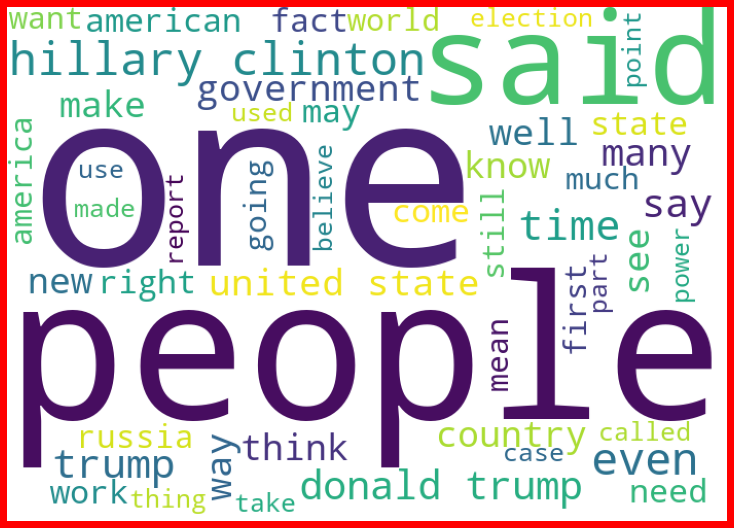

In [56]:
# Fake News Word Cloud
fake = df['f_news'][df['label']==1]
fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(fake))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Text(0.5, 0.98, 'Avg. word length in individual News')

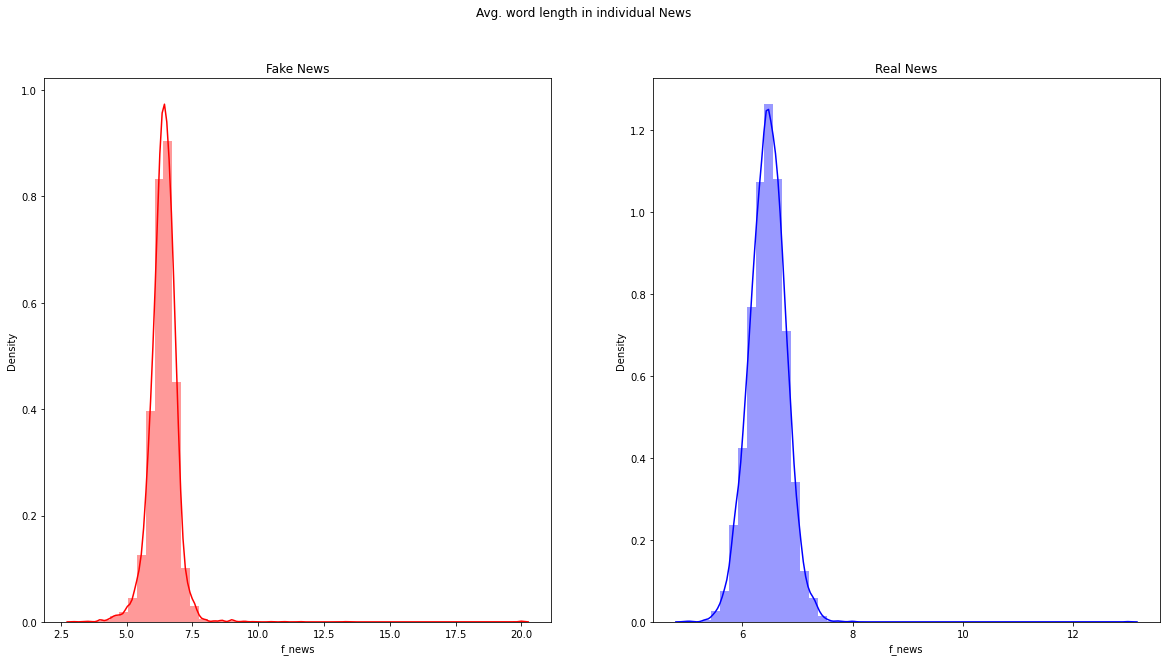

In [57]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=df[df['label']==1]['f_news'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Fake News')
word=df[df['label']==0]['f_news'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='blue')
ax2.set_title('Real News')
fig.suptitle('Avg. word length in individual News')

In [58]:
# Split Data into test & train

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [60]:
tf_vec = TfidfVectorizer(ngram_range = (2,2))

In [61]:
x = tf_vec.fit_transform(df['f_news'])
y = df['label']

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [63]:
print(f"x_train : {x_train.shape}")
print(f"y_train : {y_train.shape}")
print(f"x_test : {x_test.shape}")
print(f"y_test : {y_test.shape}")

x_train : (16608, 4433615)
y_train : (16608,)
x_test : (4153, 4433615)
y_test : (4153,)


In [64]:
# Models for Training

In [65]:
from sklearn.metrics import confusion_matrix,classification_report,auc,roc_curve,roc_auc_score,precision_score,f1_score,accuracy_score
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

In [66]:
Model = []
score = []
cvs = []
rocscore = []

In [67]:
# Logistic Regression

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy_score =  0.9275222730556224


Cross_Val_Score =  0.9259668931122867


roc_auc_score =  0.9275171086577184


classification_report
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      2076
           1       0.91      0.95      0.93      2077

    accuracy                           0.93      4153
   macro avg       0.93      0.93      0.93      4153
weighted avg       0.93      0.93      0.93      4153



[[1881  195]
 [ 106 1971]]
AxesSubplot(0.125,0.808774;0.62x0.0712264)


Text(0.5, 0, 'False Positive Rate')

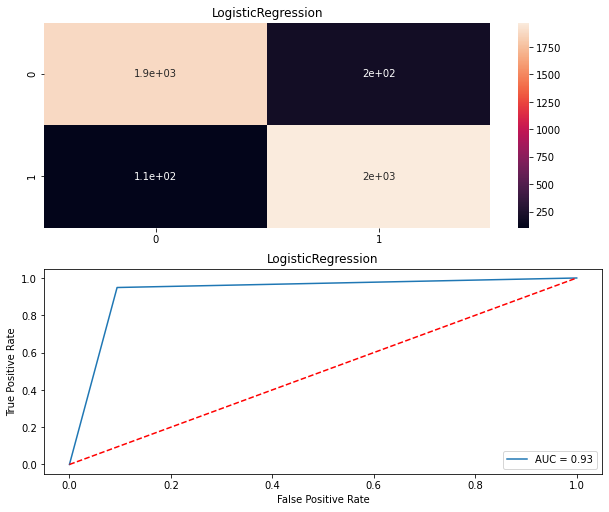

In [68]:
name = "LogisticRegression"
model = LogisticRegression()

Model.append(name)
model.fit(x_train,y_train)
print(model)
pre=model.predict(x_test)
print('\n')

AS=accuracy_score(y_test,pre)
print('Accuracy_score = ',AS)
score.append(AS*100)
print('\n')

sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
cvs.append(sc*100)
print('\n')

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print ('roc_auc_score = ',roc_auc)
rocscore.append(roc_auc*100)
print('\n')

print('classification_report\n',classification_report(y_test,pre))
print('\n')

cm=confusion_matrix(y_test,pre)
print(cm)

plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title(name)
print(sns.heatmap(cm,annot=True))
plt.subplot(912)
plt.title(name)
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [69]:
# Decision Tree Classifier

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


Accuracy_score =  0.8511919094630388


Cross_Val_Score =  0.8607001817316549


roc_auc_score =  0.8511953796187809


classification_report
               precision    recall  f1-score   support

           0       0.84      0.87      0.85      2076
           1       0.86      0.84      0.85      2077

    accuracy                           0.85      4153
   macro avg       0.85      0.85      0.85      4153
weighted avg       0.85      0.85      0.85      4153



[[1797  279]
 [ 339 1738]]
AxesSubplot(0.125,0.808774;0.62x0.0712264)


Text(0.5, 0, 'False Positive Rate')

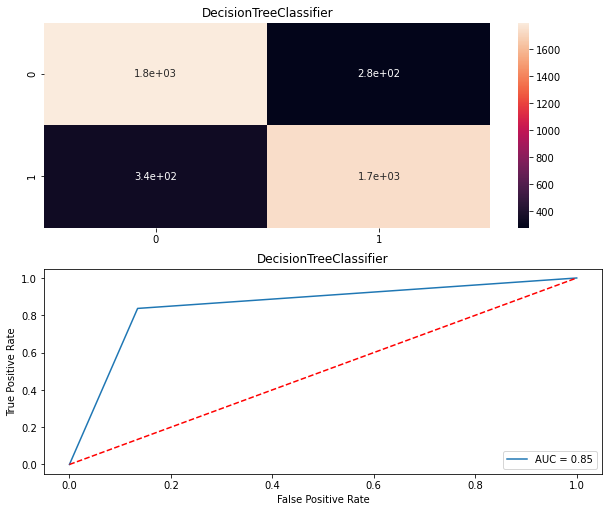

In [70]:
name = "DecisionTreeClassifier"
model = DecisionTreeClassifier()

Model.append(name)
model.fit(x_train,y_train)
print(model)
pre=model.predict(x_test)
print('\n')

AS=accuracy_score(y_test,pre)
print('Accuracy_score = ',AS)
score.append(AS*100)
print('\n')

sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
cvs.append(sc*100)
print('\n')

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print ('roc_auc_score = ',roc_auc)
rocscore.append(roc_auc*100)
print('\n')

print('classification_report\n',classification_report(y_test,pre))
print('\n')

cm=confusion_matrix(y_test,pre)
print(cm)

plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title(name)
print(sns.heatmap(cm,annot=True))
plt.subplot(912)
plt.title(name)
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [71]:
# MultinomialNB

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


Accuracy_score =  0.920298579340236


Cross_Val_Score =  0.9220171517946347


roc_auc_score =  0.920315214900697


classification_report
               precision    recall  f1-score   support

           0       0.87      0.99      0.93      2076
           1       0.99      0.85      0.91      2077

    accuracy                           0.92      4153
   macro avg       0.93      0.92      0.92      4153
weighted avg       0.93      0.92      0.92      4153



[[2054   22]
 [ 309 1768]]
AxesSubplot(0.125,0.808774;0.62x0.0712264)


Text(0.5, 0, 'False Positive Rate')

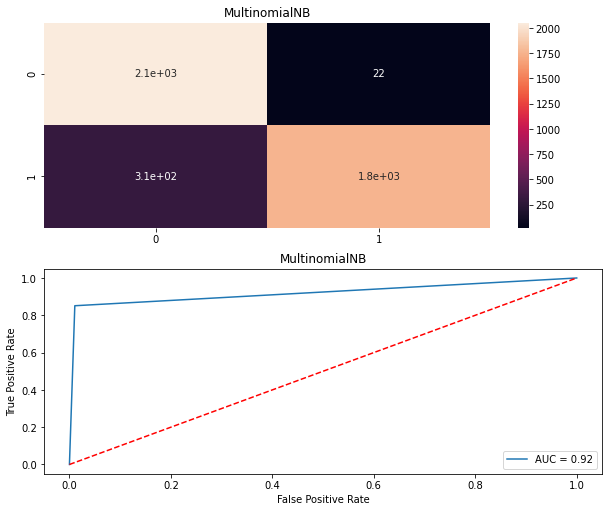

In [72]:
name = "MultinomialNB"
model = MultinomialNB()

Model.append(name)
model.fit(x_train,y_train)
print(model)
pre=model.predict(x_test)
print('\n')

AS=accuracy_score(y_test,pre)
print('Accuracy_score = ',AS)
score.append(AS*100)
print('\n')

sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
cvs.append(sc*100)
print('\n')

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print ('roc_auc_score = ',roc_auc)
rocscore.append(roc_auc*100)
print('\n')

print('classification_report\n',classification_report(y_test,pre))
print('\n')

cm=confusion_matrix(y_test,pre)
print(cm)

plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title(name)
print(sns.heatmap(cm,annot=True))
plt.subplot(912)
plt.title(name)
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [73]:
# Random Forest Classifier

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Accuracy_score =  0.9157235733204913


Cross_Val_Score =  0.9196090914066624


roc_auc_score =  0.9157169587453373


classification_report
               precision    recall  f1-score   support

           0       0.94      0.89      0.91      2076
           1       0.89      0.94      0.92      2077

    accuracy                           0.92      4153
   macro avg       0.92      0.92      0.92      4153
weighted avg       0.92      0.92      

Text(0.5, 0, 'False Positive Rate')

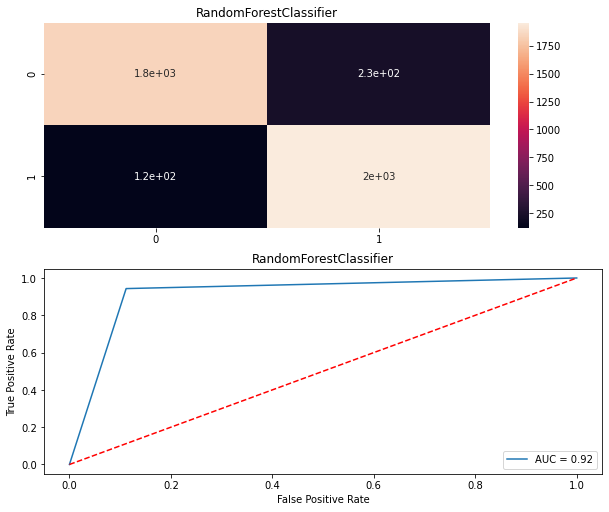

In [74]:
name = "RandomForestClassifier"
model = RandomForestClassifier()

Model.append(name)
model.fit(x_train,y_train)
print(model)
pre=model.predict(x_test)
print('\n')

AS=accuracy_score(y_test,pre)
print('Accuracy_score = ',AS)
score.append(AS*100)
print('\n')

sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
cvs.append(sc*100)
print('\n')

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print ('roc_auc_score = ',roc_auc)
rocscore.append(roc_auc*100)
print('\n')

print('classification_report\n',classification_report(y_test,pre))
print('\n')

cm=confusion_matrix(y_test,pre)
print(cm)

plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title(name)
print(sns.heatmap(cm,annot=True))
plt.subplot(912)
plt.title(name)
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [75]:
# Pasive Aggressive Classifier

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)


Accuracy_score =  0.9520828316879364


Cross_Val_Score =  0.9530848461403594


roc_auc_score =  0.9520799879031099


classification_report
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      2076
           1       0.94      0.96      0.95      2077

    accuracy                           0.95      4153
   macro avg       0.95      0.95      0.95      4153
weighted avg       0.95      0.95      0.95      4153



[[1952  124]
 [  75 2002]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


Text(0.5, 0, 'False Positive Rate')

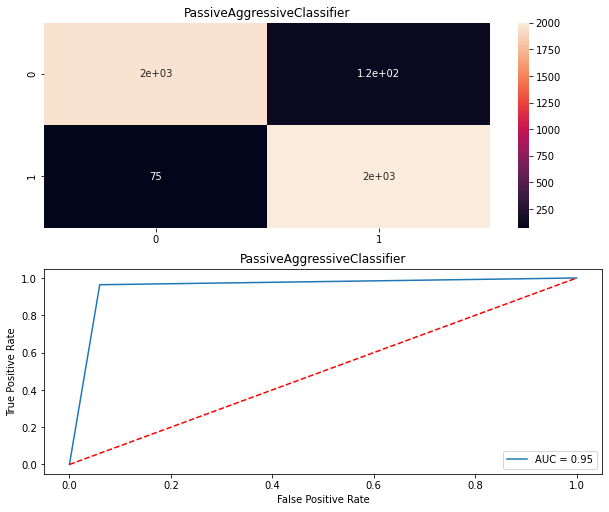

In [77]:
name = "PassiveAggressiveClassifier"
model = PassiveAggressiveClassifier()

Model.append(name)
model.fit(x_train,y_train)
print(model)
pre=model.predict(x_test)
print('\n')

AS=accuracy_score(y_test,pre)
print('Accuracy_score = ',AS)
score.append(AS*100)
print('\n')

sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
cvs.append(sc*100)
print('\n')

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print ('roc_auc_score = ',roc_auc)
rocscore.append(roc_auc*100)
print('\n')

print('classification_report\n',classification_report(y_test,pre))
print('\n')

cm=confusion_matrix(y_test,pre)
print(cm)
print('\n')

plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title(name)
print(sns.heatmap(cm,annot=True))
plt.subplot(912)
plt.title(name)
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [78]:
# Final Results

In [79]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})

In [80]:
print(result)

                         Model  Accuracy_score  Cross_val_score  Roc_auc_curve
0           LogisticRegression       92.752227        92.596689      92.751711
1       DecisionTreeClassifier       85.119191        86.070018      85.119538
2                MultinomialNB       92.029858        92.201715      92.031521
3       RandomForestClassifier       91.572357        91.960909      91.571696
4  PassiveAggressiveClassifier       95.208283        95.308485      95.207999


In [81]:
# Hence, the best model for Fake News Detection is PassiveAggressiveClassifier as it has Accuracy_score of 95.20 | Cross_val_score of 95.30 | Roc_auc_curve of 95.20